# Моделирование ПЭД

ПЭД - является асинхронным двигателем. Моделирование АД выполнялось при помощи схемы замещения





## Г - образная схема замещения

<img  src="pict/G_circuit.png" width="600"  >


### 1 Расчет параметров схемы замещения

#### 1.1 Расчет активных и индуктивных сопративлений 

$$ξ =  \frac{M_{ЭМН}}{М_Н} $$

Рекомендуется принять 1.05

Расчет вспомогательных коэффициентов:

$$a = \frac{\alpha_0}{ξ} \frac{1 - \eta_n}{\eta_n} \frac{1 - s_n}{s_n} - 1 $$

$$ R_m =\frac{3 U_n^2 (1-s_n)}{2 P_{2n} (\lambda + ξ -1)} $$

$$ G = \frac {1}{s_n^2} + \frac{2a}{s_n} + a^2$$

$$ b = \frac{\lambda + ξ -1 }{ξ} $$

Активное сопротивление обмотки ротора:
$$ r_2' = \frac{R_m}{G} (\frac{b}{s_n} + a + \sqrt{({(\frac{b}{s_n} + a)}^2 - G)}) $$

Активное сопротивление обмотки статора:

$$ r_1 = a r_2'$$

Индуктивное сопротивление обмоток для режима холостого хода:
$$ x_k = \sqrt{R_m^2 -2R_m r_1} $$

---
После нахождения сопротивлений возможно необходима проверка(или подгонка коэффициентов, для сходимости  ${P_2 \ или \ \ \lambda}$ )

$$ P_{2n} = \frac{3 U_n^2(1-s_n) r_2'/s_n}{ξ((r_1 + r_2'/s_n)^2 + x_k^2)} $$

$$ \lambda = \frac{3U_n^2}{2P_{2n}} \frac{1-s_n}{r_1 + \sqrt{r_1^2 + x_k^2}} +1-ξ$$


#### 1.2 Расчет характеристик АД при режиме холостого хода
Потребляемая мощность:
$$ P_{1n} = \frac{P_{2n}}{\eta_n} $$

Потребляемый ток:
$$ I_{1n} = \frac{P_{1n}}{3 \ U_n \ cos\varphi_n} $$

Приведенный ток в обмотке ротора;
$$ I_{2n}' = \frac{U_n}{\sqrt{x_k^2 + (r_2'/s_n + r_1)^2}} $$

Угол между $I_{1n} \  и \  U_n$
$$ \varphi_n = acos(cos\varphi_n) $$

Угол между $I_{2n} \  и \  U_n$

$$ \varphi_{2n} = arctg \frac{x_k}{r_1 + r_2'/s_n } $$

Ток холостого хода:

$$ I_0 = \sqrt{I_{1n}^2 +I_{2n}'^2 - 2 \ I_{2n}' \ I_{1n} \ cos(\varphi_n - \varphi_{2n}) } $$
Угол между $I_{1n} \  и \  I_{0}$

$$ \varphi_x = arccos\frac{I_{1n} \ cos\varphi_n - I_{2n}' cos\varphi_{2n}}{I_0} $$

Расписать про поправочный коэффициент Гридина для $I_0$ 

### 2. Механическая характеристика АД

Под механической характеристикой будем понимать зависимость параметров работы АД от скольжения 

Номинальная частота вращения ротора:
$$ f_n = f_o \ (1-s_n) $$

Номинальный момент:
$$ M_n = \frac{P_{2n}}{2 \ \pi \ f_n} $$

Момент холостого хода:
$$M_0 = M_n \ (\lambda -1 )$$

Момент ротора:
$$ M = \frac {3 \ U^2 \ r_2'/s}{2 \ \pi \ f_n \ ({x_k^2 + (r_2'/s + r_1)^2})} - M_0 $$

Приведенный ток в роторе: 
$$ I_2' = \frac{U}{\sqrt{x_k^2 + {(r_1 + r_2'\ /\ s) \ ^2}}} $$

Угол между $I_{2} \  и \  U$
$$ \varphi_2 = arctg \frac{x_k}{r_1 + r_2'/s } $$

Потребляемый ток статором:
$$ I_1 =  \sqrt{I_{0}^2 +I_{2}'^2 + 2 \ I_{2}' \ I_{x} \ cos(\varphi_x - \varphi_{2}) } $$

Коэффициент мощности:
$$ cos \varphi = \frac{I_{0} \ cos\varphi_x + I_{2}' cos\varphi_{2}}{I_1} $$

Частота вращения:
$$ n = 2  \pi  f \ (1 - s) $$

Потребляемая мощность статором:
$$P_1 = 3 U I_1 cos\varphi $$

Развиваемая можность ротором:
$$P_2 = M \  2  \pi  f $$

КПД:
$$\eta = \frac{P_2}{P_1} $$

In [8]:
# Параметры АД для теста(ПЭДН32-117-1000 Новотет)

nom_power__kW = 32
nom_voltage__V = 1000
nom_current__A = 26
nom_efficient = 0.835
nom_cos = 0.84
nom_slip = 0.05

work_voltage__V = 1000
frequency__Hz = 50

In [9]:
from equivalent_G import calc_g_circuit, calc_resistances

import numpy as np
import matplotlib.pyplot as plt


# Сопротивление схемы замещения расчитаем по методике
r_2, r_1, x_k = calc_resistances(nom_power__W=nom_power__kW * 1e3,
                                 nom_voltage__V=nom_voltage__V,
                                 nom_slip=nom_slip,
                                 nom_efficient=nom_efficient,
                                 motor_lamda=2)
print('r_2\' Om:',r_2,'r_1 Om:', r_1, 'x_k Om:', x_k)

r_2' Om: 3.603777933354165 r_1 Om: 4.256712207335698 x_k Om: 16.939193439480512


In [15]:
slip = np.arange(0.01, 0.96, 0.01)
M_ = []
cos_ = []
efficient_ = []
I1_ = []
for s in slip: 
    M__Nm,  cos_fi, efficient, I1__A =   calc_g_circuit(s, nom_power__kW, nom_voltage__V,
                                                        nom_slip, nom_efficient, nom_cos, 2, 
                                                        frequency__Hz, work_voltage__V, 
                                                        r_1, r_2, x_k)
    M_.append(M__Nm)
    cos_.append(cos_fi)
    efficient_.append(efficient)
    I1_.append(I1__A)

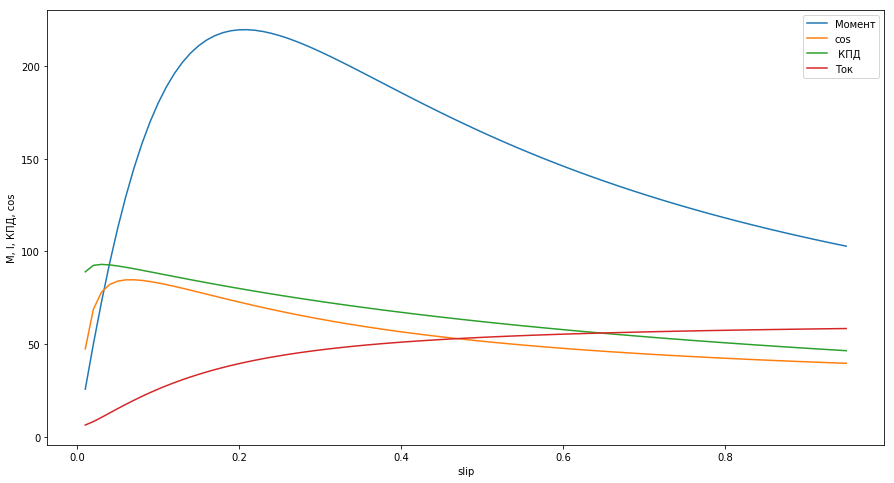

In [21]:
plt.figure(figsize=(15,8))
plt.plot(slip, M_, label='Момент')
plt.plot(slip, [cos * 100 for cos in cos_], label='cos')
plt.plot(slip, [eff*100 for eff in efficient_], label=' КПД')
plt.plot(slip, I1_, label='Ток')
plt.xlabel('slip')
plt.ylabel('M, I, КПД, cos')
plt.legend()
plt.show()